Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import raw dataset and select columns needed for ML

In [4]:
cols = ['therm_pref', 'met', 'age', 'gender', 'weight',
       'height','clo','avg_wrist_st', 'avg_ankle_st','avg_velocity','avg_co2',
       'avg_heartrate', 'avg_globe_temp','avg_testo_hum', 'avg_testo_temp1',
        'avg_temp_out', 'avg_hum_out']
ml_data=pd.read_csv('../data/dvg_climate_chamber_exp_final_data.csv', usecols=cols)

In [5]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   therm_pref       1502 non-null   int64  
 1   met              1502 non-null   float64
 2   age              1502 non-null   int64  
 3   gender           1502 non-null   int64  
 4   weight           1502 non-null   int64  
 5   height           1502 non-null   int64  
 6   avg_wrist_st     1501 non-null   float64
 7   avg_ankle_st     1501 non-null   float64
 8   avg_heartrate    1501 non-null   float64
 9   avg_globe_temp   1502 non-null   float64
 10  avg_testo_hum    1502 non-null   float64
 11  avg_testo_temp1  1502 non-null   float64
 12  avg_co2          1502 non-null   float64
 13  avg_velocity     1316 non-null   float64
 14  avg_temp_out     1502 non-null   float64
 15  avg_hum_out      1502 non-null   float64
 16  clo              1502 non-null   float64
dtypes: float64(12)

Data Cleaning

In [6]:
def wrangle_data():

   
    df=pd.DataFrame(ml_data)

    #map gender with values
    gender_map = {1:'Male',2:'Female'}
    df['gender'] =df['gender'].map(gender_map)

    #map thermal preference with the standard 3 point value
    pref_map = {1:-1,2: 0,3: 1}
    df['therm_pref'] =df['therm_pref'].map(pref_map)

    #Calculate BMI value
    df['bmi'] = df['weight']/((df['height']/100)**2) 

    #Calculate mean radiant temperature (mrt) from globe temperature, velovity and air temperature
    df['mrt'] = ((df['avg_globe_temp'] + 273.15)**4 + 2.5e8 * (df['avg_velocity'])**0.6 * (df['avg_globe_temp'] - df['avg_testo_temp1']))**0.25 - 273.15
    
    #drop columns weight and height since BMI is included
    df.drop(columns = ['weight','height',], inplace=True)
    
      
    #rename columns to simplify
    df.rename(columns={'therm_pref':'TPV', 'avg_wrist_st':'w_st','avg_ankle_st':'a_st','avg_velocity':'v',
                      'avg_testo_temp1':'rt','avg_co2':'CO2','avg_testo_hum':'rh','avg_heartrate':'hr',
                     'avg_globe_temp':'gt','avg_temp_out':'out_t','avg_hum_out':'out_rh', 'gender':'sex'}, inplace=True)
    
    return df


In [7]:
#cleaned data after preprocessing and saved as processed_data.csv
processed_data = wrangle_data()
#processed_data.to_csv('../data/processed_data.csv', index=False)

General Observation

In [8]:
processed_data.head()

TPV  met  age     sex      w_st     a_st         hr     gt     rh     rt  \
0   -1  1.2   30  Female  28.58200  28.7993  86.945652  18.29  39.77  18.63   
1    1  1.0   66    Male  29.90445  31.0381  74.120482  18.60  38.19  18.93   
2   -1  1.2   30  Female  29.35660  30.2740  86.651685  18.63  38.02  18.96   
3    1  1.0   66    Male  29.95435  31.0880  73.465116  18.65  37.74  18.97   
4    1  1.0   47    Male  29.94800  32.5880  81.819149  19.35  32.49  18.60   

     CO2      v     out_t     out_rh   clo        bmi        mrt  
0  732.9  0.038  1.336667  94.704930  1.35  22.832879  18.169260  
1  765.7  0.038  1.390000  94.639374  0.88  37.448347  18.483187  
2  763.3  0.039  1.396667  94.631180  1.35  22.832879  18.511387  
3  756.8  0.044  1.410000  94.614791  0.88  37.448347  18.526371  
4  641.1  0.035  1.423333  94.598402  0.89  22.351743  19.600292

In [9]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TPV     1502 non-null   int64  
 1   met     1502 non-null   float64
 2   age     1502 non-null   int64  
 3   sex     1502 non-null   object 
 4   w_st    1501 non-null   float64
 5   a_st    1501 non-null   float64
 6   hr      1501 non-null   float64
 7   gt      1502 non-null   float64
 8   rh      1502 non-null   float64
 9   rt      1502 non-null   float64
 10  CO2     1502 non-null   float64
 11  v       1316 non-null   float64
 12  out_t   1502 non-null   float64
 13  out_rh  1502 non-null   float64
 14  clo     1502 non-null   float64
 15  bmi     1502 non-null   float64
 16  mrt     1316 non-null   float64
dtypes: float64(14), int64(2), object(1)
memory usage: 199.6+ KB


In [10]:
processed_data.describe()

TPV         met          age         w_st         a_st  \
count  1502.000000  1502.00000  1502.000000  1501.000000  1501.000000   
mean      0.061252     1.05273    37.760985    31.805681    31.185688   
std       0.779640     0.16427    15.624747     2.247869     1.934861   
min      -1.000000     0.80000    21.000000    24.074000    25.042800   
25%      -1.000000     1.00000    27.000000    30.129000    29.898850   
50%       0.000000     1.00000    30.000000    32.070900    31.165000   
75%       1.000000     1.00000    53.000000    33.627000    32.612000   
max       1.000000     2.00000    67.000000    36.623000    35.519000   

                hr           gt           rh           rt          CO2  \
count  1501.000000  1502.000000  1502.000000  1502.000000  1502.000000   
mean     74.800225    23.273644    36.196402    23.100670   676.964133   
std       8.519098     3.525380     6.801567     3.641518    75.015118   
min      54.788889    16.620000    23.060000    16.660000   420.800000   
25%      68.784946    20.272500    31.120000    19.962500   632.700000   
50%      74.447059    23.400000    36.010000    22.810000   674.000000   
75%      80.352941    26.270000    40.497500    26.260000   715.000000   
max     112.096774    31.830000    61.070000    31.140000   975.400000   

                 v        out_t       out_rh          clo          bmi  \
count  1316.000000  1502.000000  1502.000000  1502.000000  1502.000000   
mean      0.060668     4.611029    83.696705     0.861565    26.044611   
std       0.034136     4.006318     8.870293     0.283155     5.199620   
min       0.000000    -2.495000    66.803553     0.290000    19.047004   
25%       0.040000     2.017208    75.848491     0.680000    22.832879   
50%       0.056000     4.034792    83.988680     0.880000    24.691358   
75%       0.075000     8.702846    91.238453     1.010000    27.681661   
max       0.257000    10.637920    99.284170     1.350000    42.669153   

               mrt  
count  1316.000000  
mean     22.975997  
std       3.431569  
min      16.277274  
25%      20.213565  
50%      22.740472  
75%      25.697005  
max      32.170782

In [11]:
#Categorize data into categorical and continuous data
sel_cols = ['tpv', 'sex', 'met', 'age']

categorical_val = []
continuous_val = []
for column in processed_data.columns:
    if column in sel_cols:
        print(f"{column} : {processed_data[column].unique()}")
    if processed_data[column].dtypes == 'object':
        categorical_val.append(column)
    else:
        continuous_val.append(column)
continuous_data = processed_data[continuous_val]
categorical_data = processed_data[categorical_val]




met : [1.2 1.  1.6 1.7 2.  0.8]
age : [30 66 47 53 35 67 24 27 21 26 33 29 25 28 65]
sex : ['Female' 'Male']


In [12]:
continuous_data.describe()

TPV         met          age         w_st         a_st  \
count  1502.000000  1502.00000  1502.000000  1501.000000  1501.000000   
mean      0.061252     1.05273    37.760985    31.805681    31.185688   
std       0.779640     0.16427    15.624747     2.247869     1.934861   
min      -1.000000     0.80000    21.000000    24.074000    25.042800   
25%      -1.000000     1.00000    27.000000    30.129000    29.898850   
50%       0.000000     1.00000    30.000000    32.070900    31.165000   
75%       1.000000     1.00000    53.000000    33.627000    32.612000   
max       1.000000     2.00000    67.000000    36.623000    35.519000   

                hr           gt           rh           rt          CO2  \
count  1501.000000  1502.000000  1502.000000  1502.000000  1502.000000   
mean     74.800225    23.273644    36.196402    23.100670   676.964133   
std       8.519098     3.525380     6.801567     3.641518    75.015118   
min      54.788889    16.620000    23.060000    16.660000   420.800000   
25%      68.784946    20.272500    31.120000    19.962500   632.700000   
50%      74.447059    23.400000    36.010000    22.810000   674.000000   
75%      80.352941    26.270000    40.497500    26.260000   715.000000   
max     112.096774    31.830000    61.070000    31.140000   975.400000   

                 v        out_t       out_rh          clo          bmi  \
count  1316.000000  1502.000000  1502.000000  1502.000000  1502.000000   
mean      0.060668     4.611029    83.696705     0.861565    26.044611   
std       0.034136     4.006318     8.870293     0.283155     5.199620   
min       0.000000    -2.495000    66.803553     0.290000    19.047004   
25%       0.040000     2.017208    75.848491     0.680000    22.832879   
50%       0.056000     4.034792    83.988680     0.880000    24.691358   
75%       0.075000     8.702846    91.238453     1.010000    27.681661   
max       0.257000    10.637920    99.284170     1.350000    42.669153   

               mrt  
count  1316.000000  
mean     22.975997  
std       3.431569  
min      16.277274  
25%      20.213565  
50%      22.740472  
75%      25.697005  
max      32.170782

In [13]:
categorical_data.describe()

sex
count     1502
unique       2
top     Female
freq       861

Data Visualization

<Figure size 2000x2000 with 0 Axes>

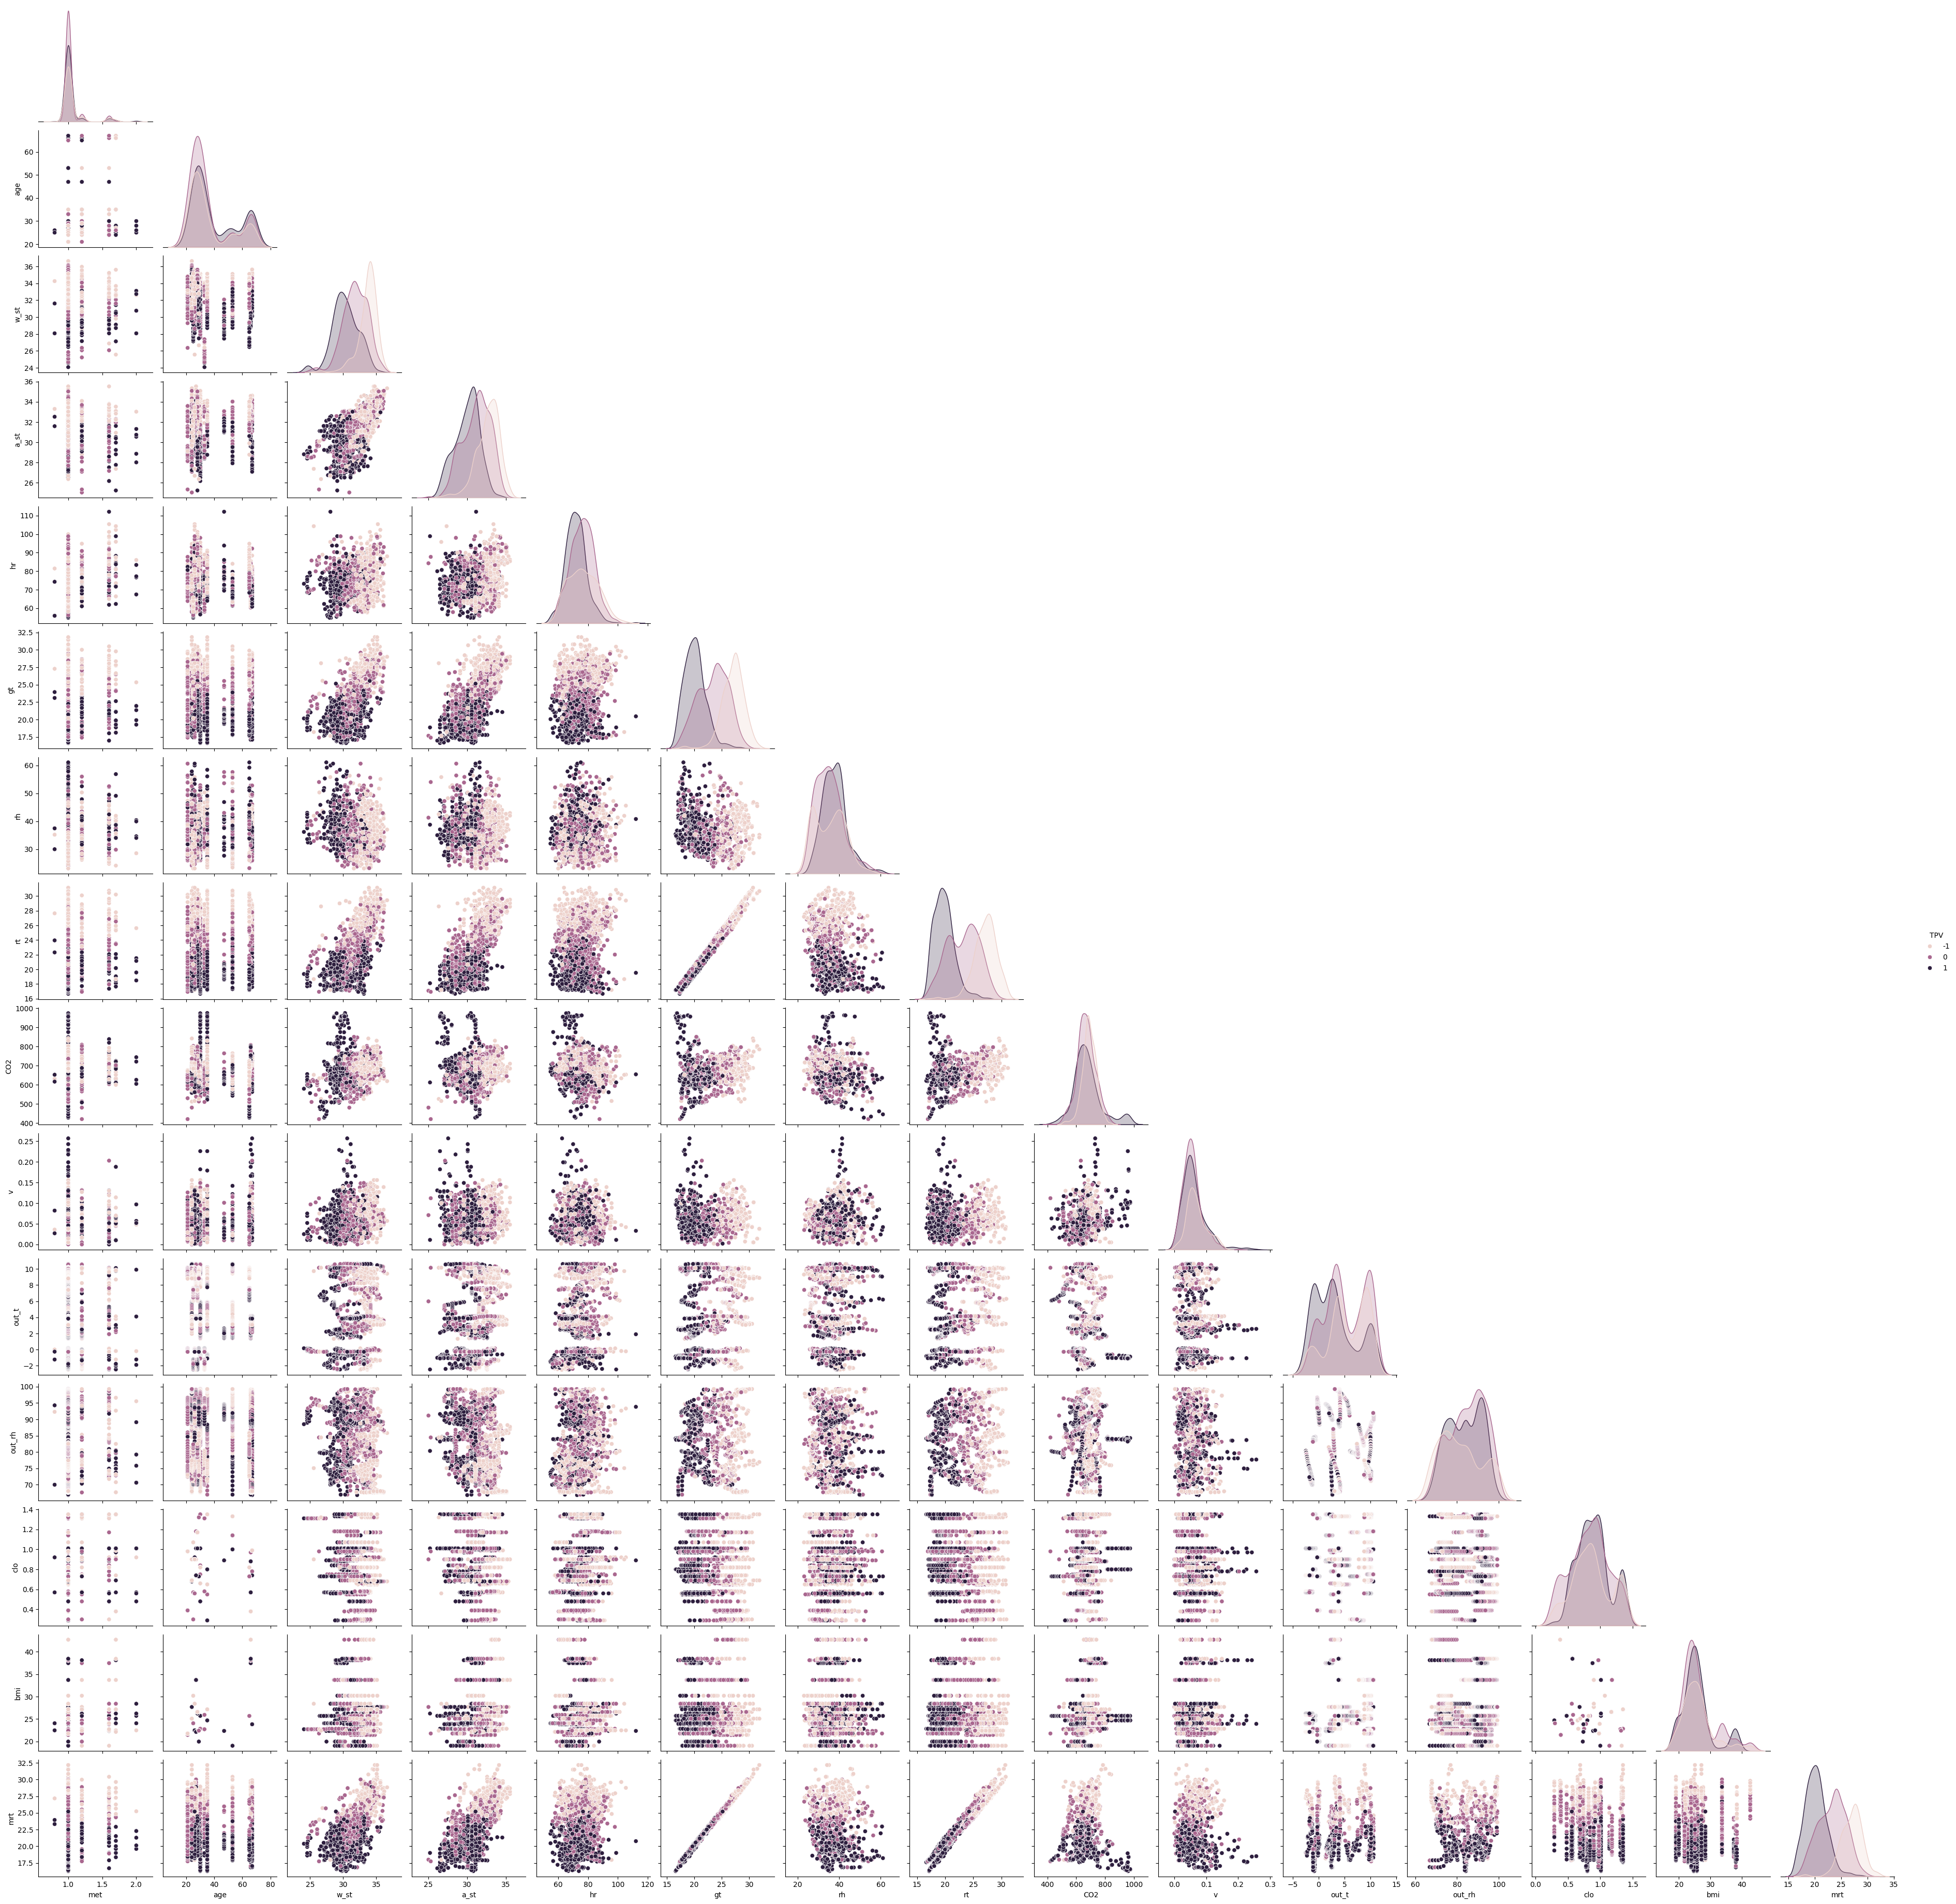

In [14]:
# Pair plot
plt.figure(figsize=(20, 20))
sns.pairplot(processed_data, hue='TPV', corner=True)
plt.savefig('../EDA_plots/pair_plot.png')
plt.show()

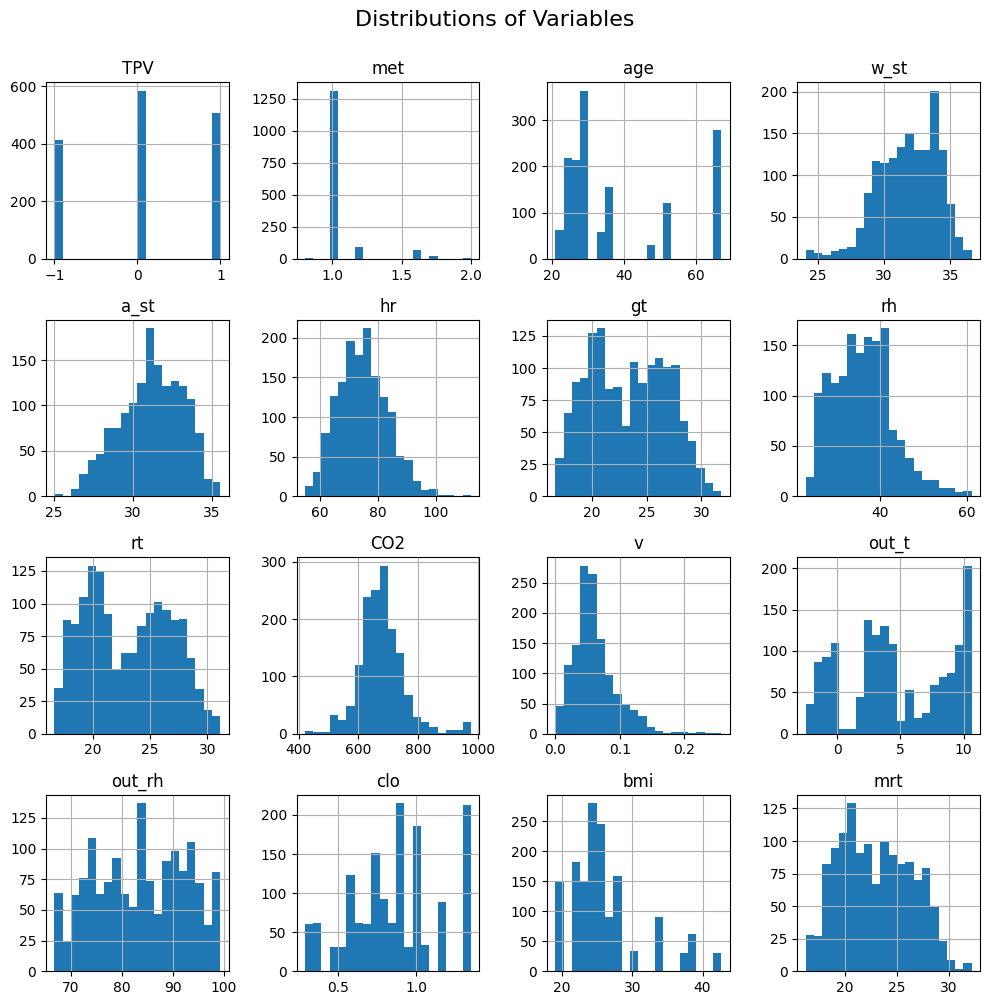

In [15]:
# Histogram plot for the continuous variables
continuous_data.hist(bins=20, figsize=(10, 10))

plt.suptitle("Distributions of Variables", size=16, y=1)  
plt.tight_layout(rect=[0, 0, 1, 1]) 
plt.show()

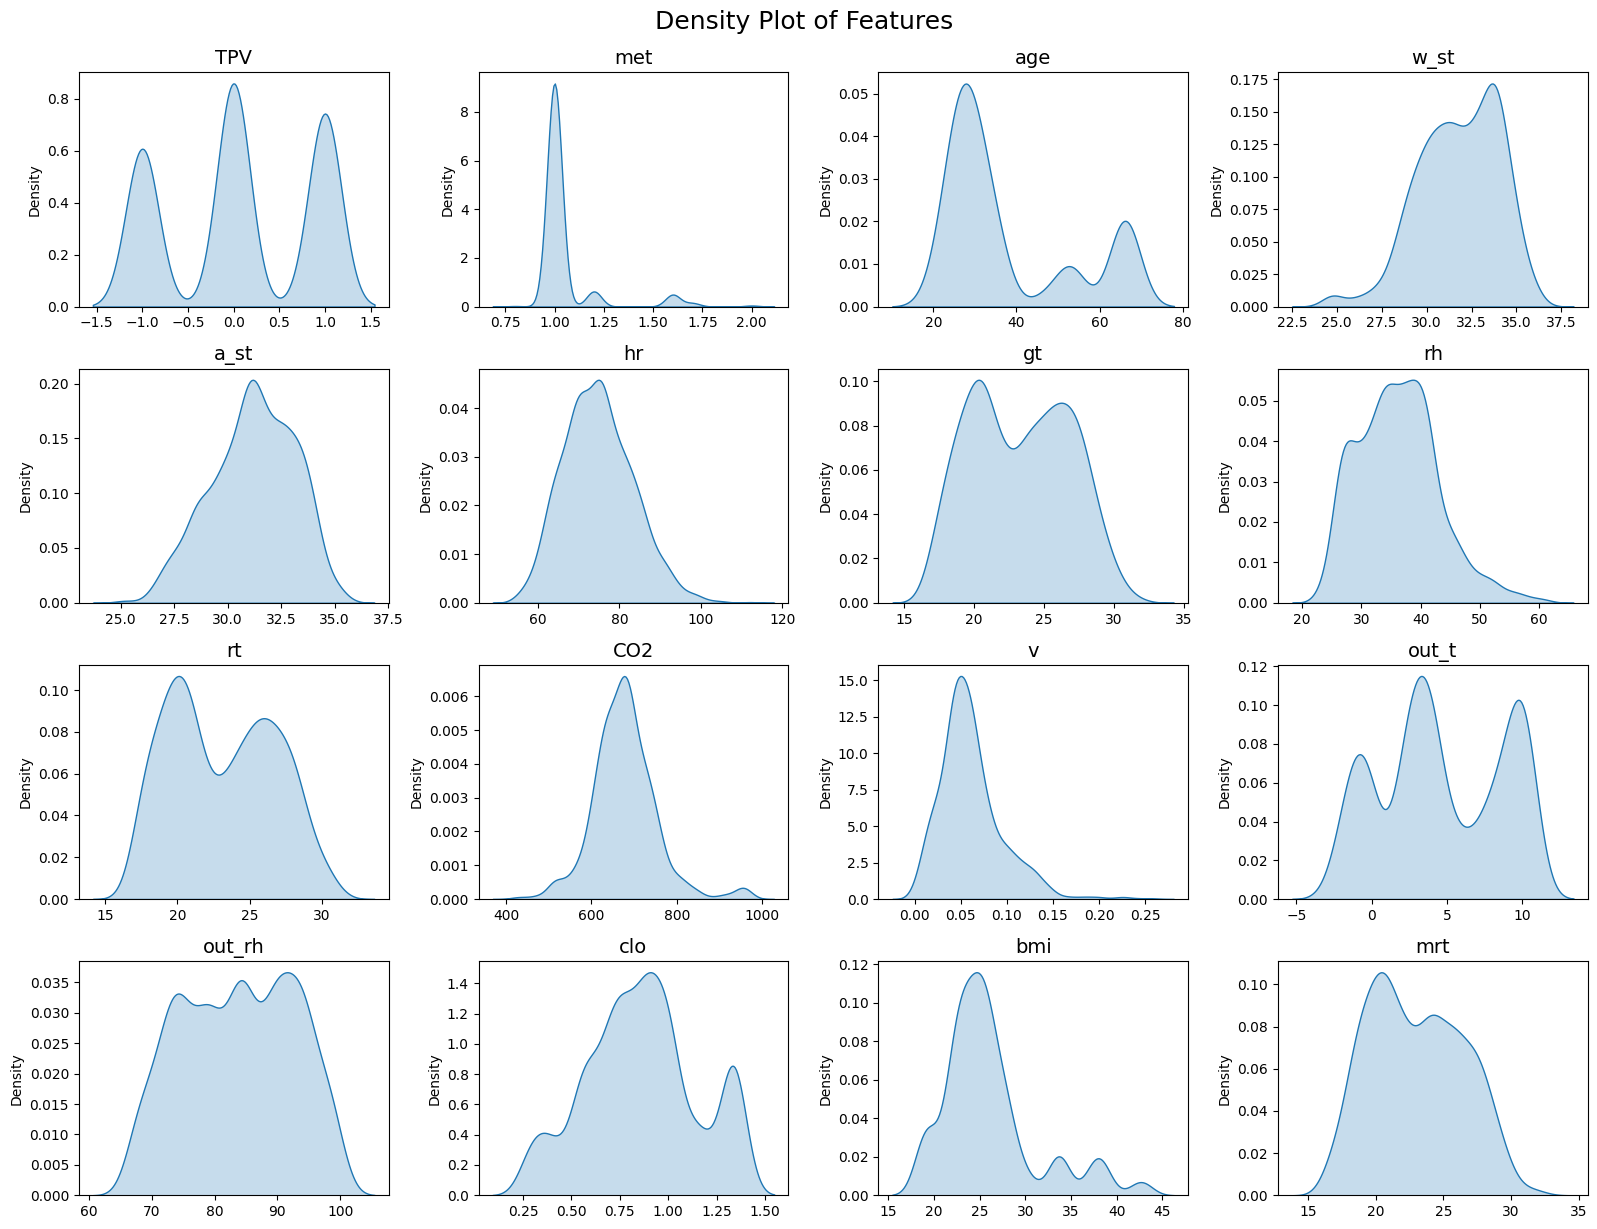

In [16]:
#Density plot
num_cols = len(continuous_data.columns)
cols_per_row = 4
rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, rows * 3))
axes = axes.flatten()

for i, column in enumerate(continuous_data.columns):
    sns.kdeplot(continuous_data[column], ax=axes[i], fill=True, label=column)    
    axes[i].set_title(column, fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.suptitle('Density Plot of Features', fontsize=18, y=1.02)
plt.savefig('../EDA_plots/density_plot.png', bbox_inches='tight')
plt.show()


sex
Female    861
Male      641
Name: count, dtype: int64


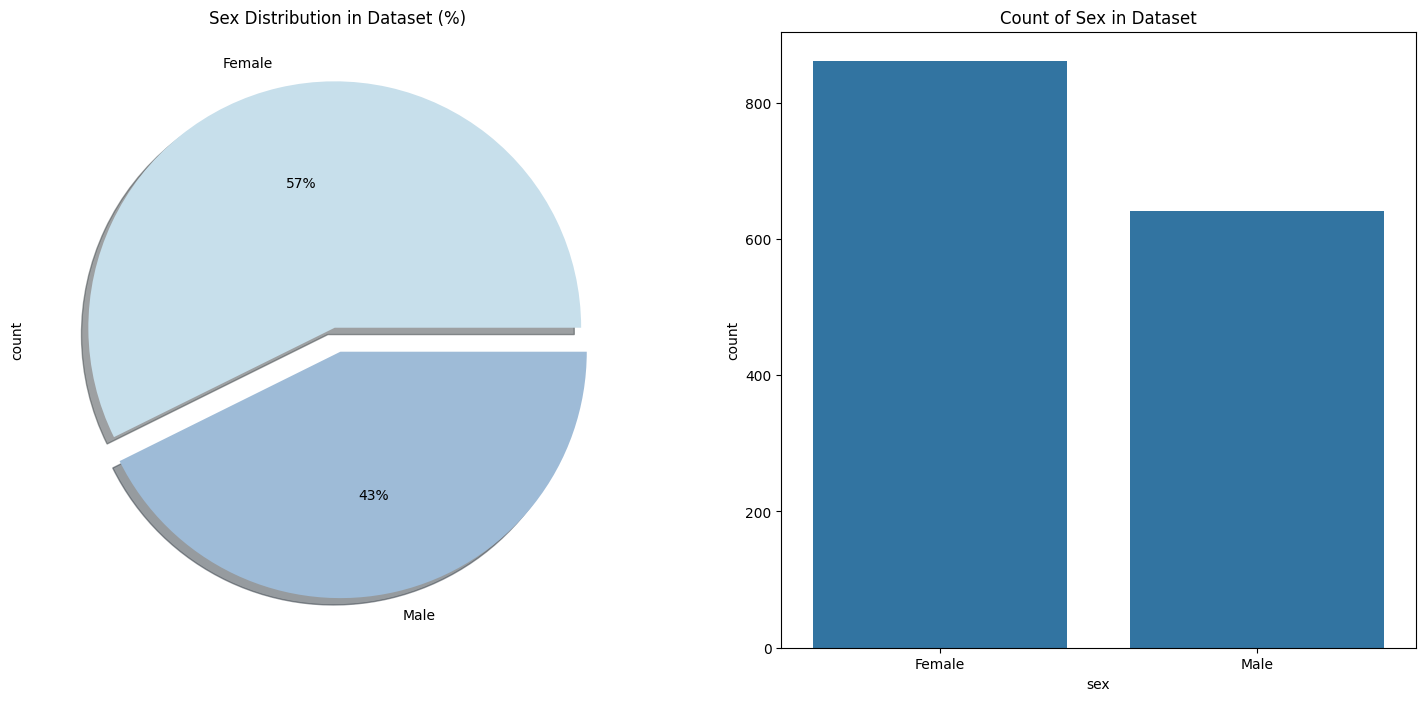

In [17]:
# Sex distribution
print(processed_data.sex.value_counts())
f, ax = plt.subplots(1, 2, figsize=(18, 8))
explode = [0.05, 0.05]  
processed_data.sex.value_counts().plot.pie(explode=explode,colors = sns.color_palette('ch:s=.25,rot=-.25'), autopct='%1.0f%%', ax=ax[0], shadow=True)
sns.countplot(data=processed_data, x='sex', ax=ax[1])
ax[0].set_title('Sex Distribution in Dataset (%)')
ax[1].set_title('Count of Sex in Dataset')
plt.show()

TPV
 0    584
 1    505
-1    413
Name: count, dtype: int64


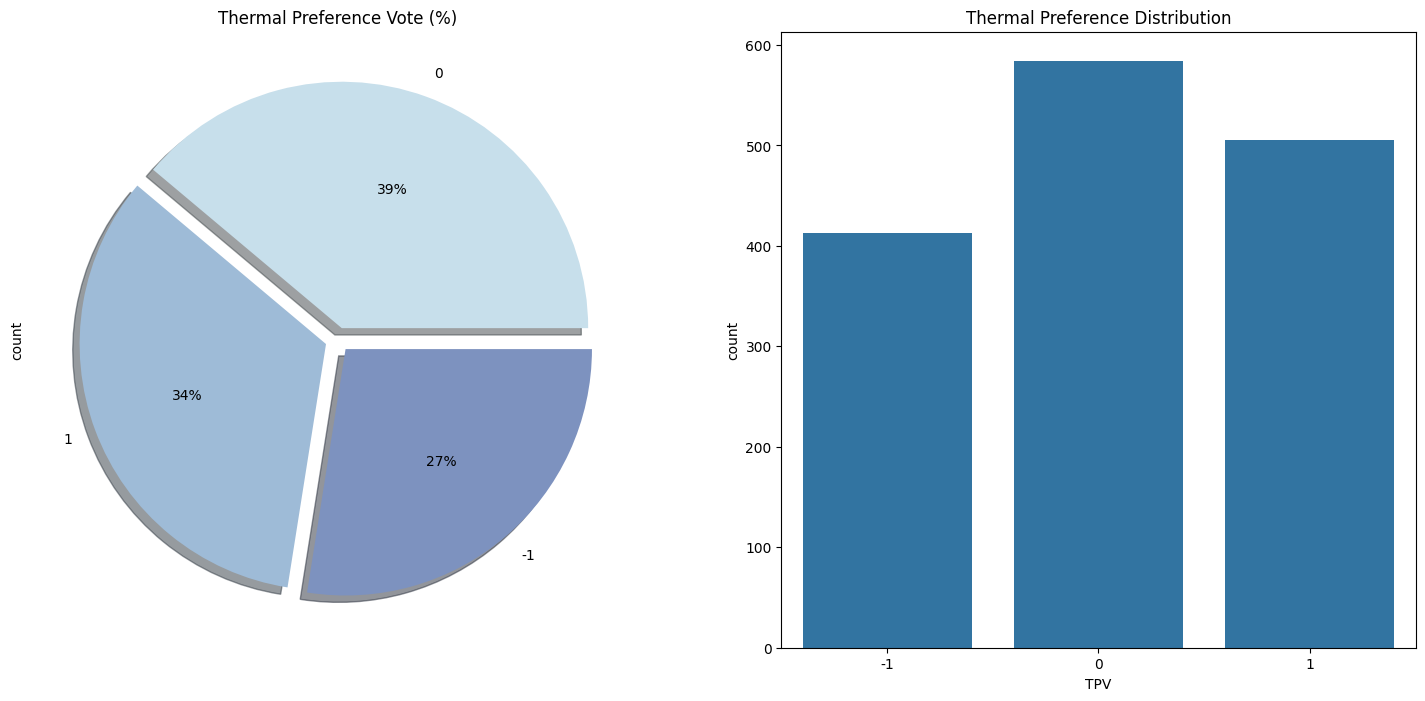

In [18]:
# Unique value count for TPV
print(processed_data.TPV.value_counts())
f, ax = plt.subplots(1, 2, figsize=(18, 8))
explode = [0.05, 0.05, 0.05]  
processed_data.TPV.value_counts().plot.pie(explode=explode,colors = sns.color_palette('ch:s=.25,rot=-.25'), autopct='%1.0f%%', ax=ax[0], shadow=True)
sns.countplot(data=processed_data, x='TPV', ax=ax[1])
ax[0].set_title('Thermal Preference Vote (%)')
ax[1].set_title('Thermal Preference Distribution')
plt.show()

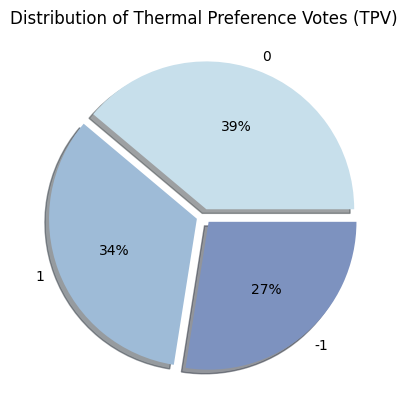

In [19]:
explode = (0.05, 0.05, 0.05) 
processed_data['TPV'].value_counts().plot.pie(explode=explode,colors=sns.color_palette('ch:s=.25,rot=-.25'),shadow =True, autopct='%1.0f%%')
plt.title("Distribution of Thermal Preference Votes (TPV)")
plt.ylabel('')
plt.savefig('../EDA_plots/tpv_pie_chart.png', bbox_inches='tight')
plt.show()

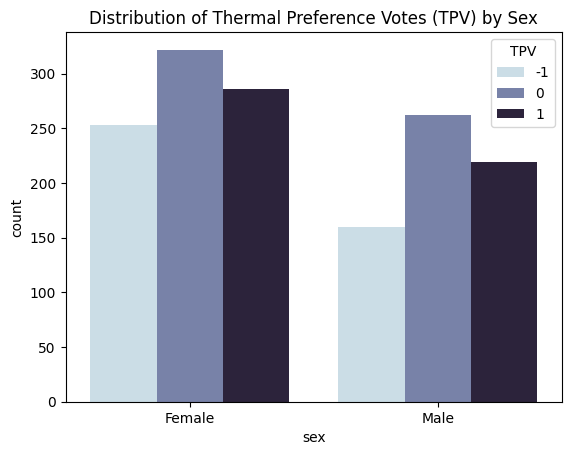

In [20]:
#Distribution of Thermal Preference Votes (TPV) by Sex
sns.countplot(processed_data, x='sex', hue='TPV', palette='ch:s=.25,rot=-.25')
plt.title("Distribution of Thermal Preference Votes (TPV) by Sex")
plt.show()

Correlation Analysis

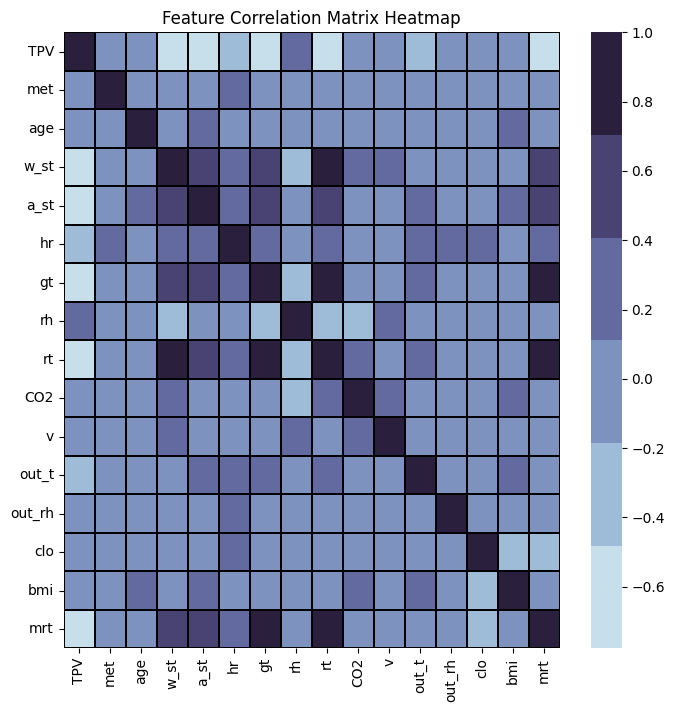

In [21]:
#Pearson Correlation of features with heatmap
corr_matrix = continuous_data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(corr_matrix,
                 linewidths=0.1,
                 linecolor='black',
                 cmap=sns.color_palette('ch:s=.25,rot=-.25'));
bottom, top = ax.get_ylim()
ax.set_title("Feature Correlation Matrix Heatmap")
plt.savefig('../EDA_plots/heatmap.png', bbox_inches='tight')
plt.show()

In [22]:
#correlation with respect to target('TPV')
feat_corr_tpv = continuous_data.drop('TPV', axis=1).corrwith(continuous_data.TPV)
feat_corr_tpv


met      -0.033038
age       0.087286
w_st     -0.577495
a_st     -0.537326
hr       -0.225611
gt       -0.763239
rh        0.145573
rt       -0.777457
CO2      -0.061202
v        -0.069914
out_t    -0.230718
out_rh    0.077407
clo       0.039915
bmi      -0.028197
mrt      -0.749736
dtype: float64

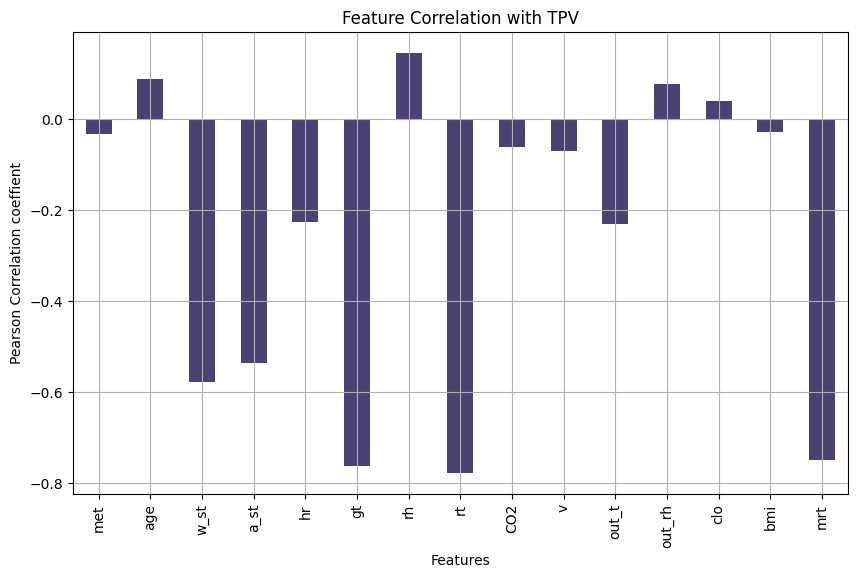

In [23]:
#plot of correlation
feat_corr_tpv.plot(kind='bar',
                    grid=True,
                    color='#494373',
                    figsize=(10, 6))
plt.title('Feature Correlation with TPV')
plt.ylabel('Pearson Correlation coeffient')
plt.xlabel('Features')
plt.savefig('../EDA_plots/feat_corr_tpv.png', bbox_inches='tight')
plt.show()

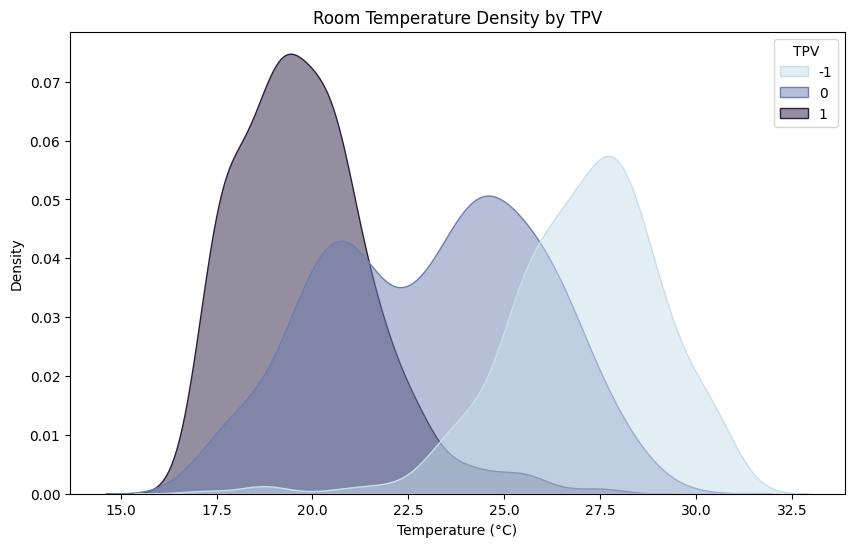

In [24]:
#Densityplot of TPV against temp
plt.figure(figsize=(10, 6))
sns.kdeplot(data=continuous_data, x='rt', hue='TPV', palette='ch:s=.25,rot=-.25', fill=True, alpha=0.5)
plt.title('Room Temperature Density by TPV')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
#plt.savefig('../EDA_plots/kde_tpv_temp.png', bbox_inches='tight')
plt.show()


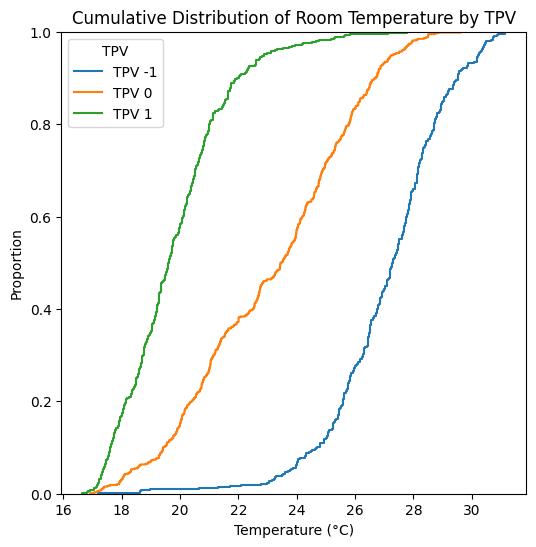

In [30]:
plt.figure(figsize=(6, 6))
for tpv in sorted(continuous_data['TPV'].unique()):
    sns.ecdfplot(data=continuous_data[continuous_data['TPV'] == tpv], x='rt', label=f'TPV {tpv}')
plt.title('Cumulative Distribution of Room Temperature by TPV')
plt.xlabel('Temperature (°C)')
plt.ylabel('Proportion')
plt.legend(title='TPV')
plt.savefig('../EDA_plots/ecdf_tpv_temp.png', bbox_inches='tight')
plt.show()


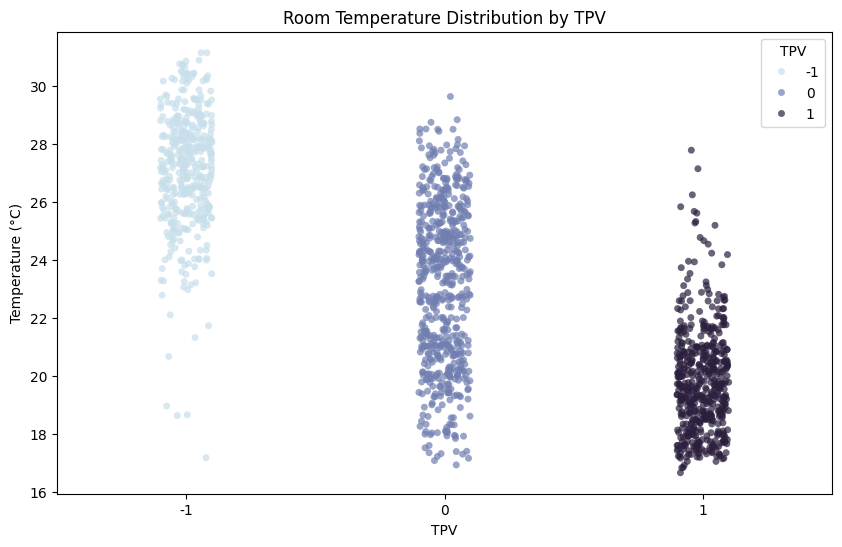

In [26]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='TPV', y='rt', data=continuous_data, palette='ch:s=.25,rot=-.25', hue= 'TPV',jitter=True, alpha=0.7)
plt.title('Room Temperature Distribution by TPV')
plt.xlabel('TPV')
plt.ylabel('Temperature (°C)')
#plt.savefig('../EDA_plots/stri_tpv_temp.png', bbox_inches='tight')
plt.show()


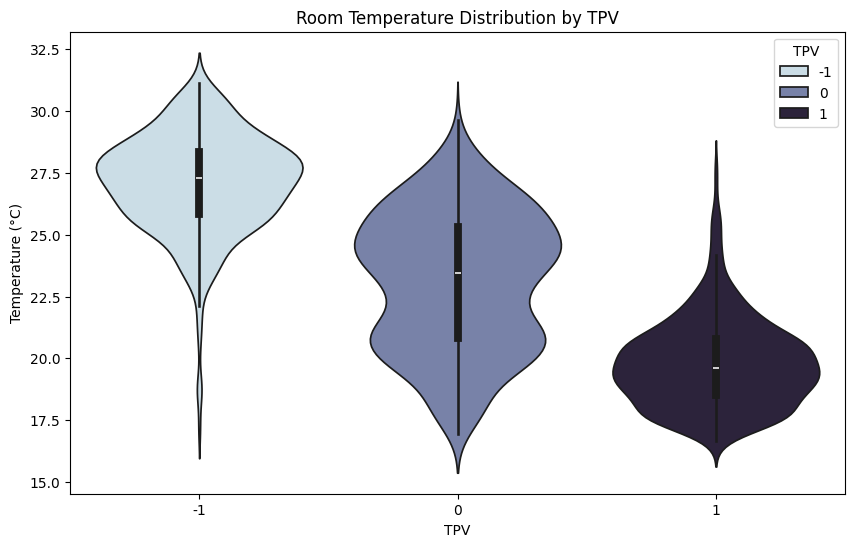

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='TPV', y='rt', data=continuous_data, palette='ch:s=.25,rot=-.25', hue='TPV')
plt.title('Room Temperature Distribution by TPV')
plt.xlabel('TPV')
plt.ylabel('Temperature (°C)')
#plt.savefig('../EDA_plots/vio_tpv_temp.png', bbox_inches='tight')
plt.show()

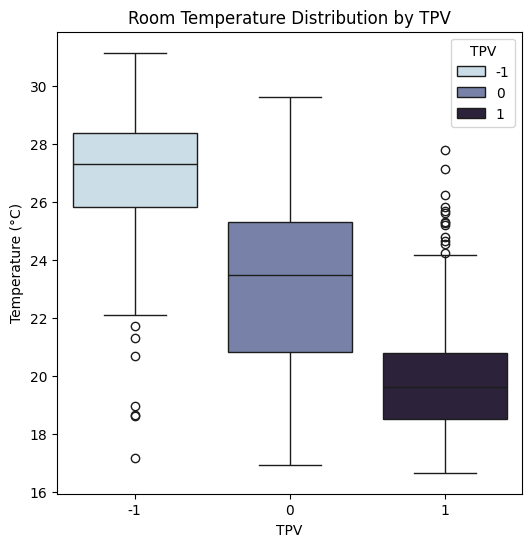

In [31]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='TPV', y='rt', data=continuous_data, palette='ch:s=.25,rot=-.25', hue='TPV')
plt.title('Room Temperature Distribution by TPV')
plt.xlabel('TPV')
plt.ylabel('Temperature (°C)')
plt.savefig('../EDA_plots/box_tpv_temp.png', bbox_inches='tight')
plt.show()